# Part A

In [1]:
#Pkg.add("NLopt")
#Pkg.add("JuMP")
using JuMP
using NLopt

m = Model(solver=NLoptSolver(algorithm=:LD_MMA))

a1 = 2
b1 = 0
a2 = -1
b2 = 1

T=1

@variable(m, 0<=x1<=5)
@variable(m, 0<=x2<=5)
@variable(m, 0<=x3<=5)

@NLobjective(m, Max, 20*x1+16*x2-(T*(2*(x1)^2+(x2)^2+(x3)^2)))
@NLconstraint(m, x1+x2<=5)
@NLconstraint(m, x1+x2-x3 <= 0)
@NLconstraint(m, x1+x2-x3 >= 0)



status = solve(m)

println("got ", getobjectivevalue(m), " at ", [getvalue(x1),getvalue(x2),getvalue(x3)])

got 46.33149336884889 at 

[2.358081774046076,2.641917991865368,5.0]


# Part B

In [14]:
using Ipopt
using JuMP

m = Model(solver=IpoptSolver(print_level=0))

a1 = 2
b1 = 0
a2 = -1
b2 = 1

T=[0,1,2,3,4,5]

@variable(m, 0<=x1<=5)
@variable(m, 0<=x2<=5)
@variable(m, 0<=x3<=5)


@NLconstraint(m, x1+x2<=5)
@NLconstraint(m, x1+x2-x3 <= 0)
@NLconstraint(m, x1+x2-x3 >= 0)

for i=1:length(T)
    @NLobjective(m, Max, 20*x1+16*x2-(T[i]*(2*(x1)^2+(x2)^2+(x3)^2)))
    status = solve(m)
    println("Theta=",T[i])
    println("got ", getobjectivevalue(m), " with weights ", [getvalue(x1),getvalue(x2),getvalue(x3)])
end

Theta=0
got 100.00000023330931 with weights [5.0,0.0,5.0]
Theta=1
got 46.333333432659465 with weights [2.3333333342767855,2.666666668419326,4.999999992943239]
Theta=2
got 23.20000010159641 with weights [1.200000001985744,1.4000000038877487,2.5999999961046076]
Theta=3
got 15.466666768219731 with weights [0.8000000020500867,0.9333333373556657,1.7333333296410347]
Theta=4
got 11.600000103995479 with weights [0.6000000021196622,0.7000000041630897,1.2999999962831867]
Theta=5
got 9.280000103995567 with weights [0.48000000213123317,0.5600000041868947,1.0399999963185542]


# Part C

In [12]:
using Ipopt
using JuMP

m = Model(solver=IpoptSolver(print_level=0))

a1 = 2
b1 = 0
a2 = -1
b2 = 1

T=[0,1,2,3,4,5]
a=Float64[]

@variable(m, 0<=x1<=5)
@variable(m, 0<=x2<=5)
@variable(m, 0<=x3<=5)


@NLconstraint(m, x1+x2<=5)
@NLconstraint(m, x1+x2-x3 <= 0)
@NLconstraint(m, x1+x2-x3 >= 0)

for i=1:length(T)
    @NLobjective(m, Max, 20*x1+16*x2-(T[i]*(2*(x1)^2+(x2)^2+(x3)^2)))
    status = solve(m)
    push!(a,getobjectivevalue(m))
end

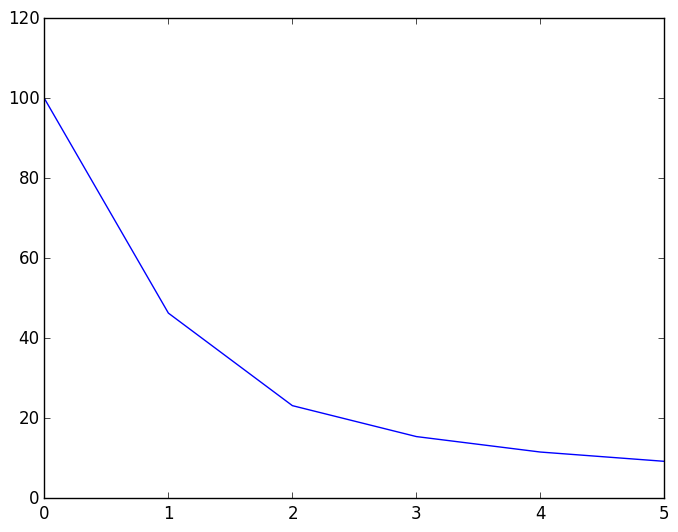

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321e80e10>

In [13]:
using PyPlot
plot(T,a, label="Tradeoff Curve of Theta vs. Expected Return")#, xlabel="Theta")
